# Random Forest: Feature Selection

In [1]:
import sys
print(sys.executable)

# shift 42 days?????

/Users/kata/opt/anaconda3/bin/python


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import treeplot
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn import tree
import warnings

warnings.simplefilter(action='ignore')

In [3]:
# https://mljar.com/blog/visualize-decision-tree/
df = pd.read_csv('/Users/kata/Desktop/GitHub/standby_duty_forecasting/sickness_table.csv', index_col=0)
df['date'] = pd.to_datetime(df['date'])
df


,date,n_sick,calls,n_duty,n_sby,sby_need,dafted
0,2016-04-01,73,8154.0,1700,90,4.0,0.0
1,2016-04-02,64,8526.0,1700,90,70.0,0.0
2,2016-04-03,68,8088.0,1700,90,0.0,0.0
3,2016-04-04,71,7044.0,1700,90,0.0,0.0
4,2016-04-05,63,7236.0,1700,90,0.0,0.0
...,...,...,...,...,...,...,...
1147,2019-05-23,86,8544.0,1900,90,0.0,0.0
1148,2019-05-24,81,8814.0,1900,90,0.0,0.0
1149,2019-05-25,76,9846.0,1900,90,146.0,56.0
1150,2019-05-26,83,9882.0,1900,90,160.0,70.0


In [4]:
df['diff_drivers'] = df['n_duty'] - df['n_sick']


df['year']= df['date'].dt.year
df['month']= df['date'].dt.month
df['day']= df['date'].dt.day

In [5]:
df['day_of_week'] = df['date'].dt.dayofweek
df


,date,n_sick,calls,n_duty,n_sby,sby_need,dafted,diff_drivers,year,month,day,day_of_week
0,2016-04-01,73,8154.0,1700,90,4.0,0.0,1627,2016,4,1,4
1,2016-04-02,64,8526.0,1700,90,70.0,0.0,1636,2016,4,2,5
2,2016-04-03,68,8088.0,1700,90,0.0,0.0,1632,2016,4,3,6
3,2016-04-04,71,7044.0,1700,90,0.0,0.0,1629,2016,4,4,0
4,2016-04-05,63,7236.0,1700,90,0.0,0.0,1637,2016,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1147,2019-05-23,86,8544.0,1900,90,0.0,0.0,1814,2019,5,23,3
1148,2019-05-24,81,8814.0,1900,90,0.0,0.0,1819,2019,5,24,4
1149,2019-05-25,76,9846.0,1900,90,146.0,56.0,1824,2019,5,25,5
1150,2019-05-26,83,9882.0,1900,90,160.0,70.0,1817,2019,5,26,6


In [6]:
df['week'] = df['date'].dt.isocalendar().week

In [7]:
df['week'] = df['week'].astype(np.int64)

In [8]:
# convert week to uint64 because of xgboost error
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152 entries, 0 to 1151
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1152 non-null   datetime64[ns]
 1   n_sick        1152 non-null   int64         
 2   calls         1152 non-null   float64       
 3   n_duty        1152 non-null   int64         
 4   n_sby         1152 non-null   int64         
 5   sby_need      1152 non-null   float64       
 6   dafted        1152 non-null   float64       
 7   diff_drivers  1152 non-null   int64         
 8   year          1152 non-null   int64         
 9   month         1152 non-null   int64         
 10  day           1152 non-null   int64         
 11  day_of_week   1152 non-null   int64         
 12  week          1152 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(9)
memory usage: 126.0 KB


In [9]:
X = df[['n_sick', 'calls', 'n_duty', 'n_sby', 'diff_drivers', 'year', 'month', 'day_of_week',
       'week']]
y = df.sby_need

In [10]:
def train_test_split(data, n_test):
	return data[:n_test], data[n_test:]

In [11]:

x_train, x_test = train_test_split(X, 921)
y_train, y_test = train_test_split(y, 921)


In [ ]:
tree_reg = DecisionTreeRegressor(max_depth=7, random_state=42)
tree_reg.fit(x_train, y_train)

In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
ax = treeplot.plot(tree_reg, plottype='vertical')


In [ ]:
test_pred = tree_reg.predict(x_test)
train_pred = tree_reg.predict(x_train)
y2 = np.concatenate((train_pred, test_pred))



In [ ]:
# create column numerate
df['numbers'] = np.arange(len(df))
df

In [ ]:
y_test.shape
df.numbers.iloc[921:].shape

In [ ]:

# Plot the results
plt.figure(figsize=(14,8))
plt.scatter(df.numbers.iloc[921:], y_test, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(df.numbers.iloc[921:], test_pred, color="cornflowerblue", label="Prediction", linewidth=1)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()



In [ ]:
print('mse test set ' + str(mean_squared_error(y_test, test_pred)))
print('mse train set ' + str(mean_squared_error(y_train, train_pred)))


In [ ]:
# max depth 7
# mse test set 67.99505531505531
# mse train set 0.10941006152732537

In [ ]:
#max depth 5
# mse test set 68.29361982132801
# mse train set 3.589715752337902

In [ ]:
# https://machinelearningmastery.com/calculate-feature-importance-with-python/

#CART
model = DecisionTreeRegressor()
# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in zip(x_train.columns, enumerate(importance)):
	print('Feature: %s, Score: %.5f' % (i,v[1]))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# https://machinelearningmastery.com/calculate-feature-importance-with-python/


In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
model = RandomForestRegressor()
# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in zip(x_train.columns, enumerate(importance)):
	print('Feature: %s, Score: %.5f' % (i,v[1]))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
import xgboost
from xgboost import XGBRegressor
from sklearn import preprocessing



In [ ]:
# xgboost


model = XGBRegressor()
# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in zip(x_train.columns, enumerate(importance)):
	print('Feature: %s, Score: %.5f' % (i,v[1]))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()



In [ ]:
# permutation
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

In [ ]:
model = KNeighborsRegressor()
# fit the model
model.fit(x_train, y_train)
# perform permutation importance
results = permutation_importance(model, x_train, y_train, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in zip(x_train.columns, enumerate(importance)):
	print('Feature: %s, Score: %.5f' % (i,v[1]))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# https://machinelearningmastery.com/xgboost-for-time-series-forecasting/
import xgboost
print("xgboost", xgboost.__version__)


In [ ]:
model = XGBRegressor()

In [ ]:
model.fit(x_train, y_train)

In [ ]:
pred_y = model.predict(x_test)

In [ ]:
plt.plot(x_test.index, pred_y, color='red', label='pred')
plt.plot(x_test.index, y_test, color='blue', label='true', alpha=0.5)
plt.show()

In [ ]:
mean_squared_error(y_test, pred_y)


In [ ]:
# best mse with only sby need

In [ ]:
# https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

In [ ]:
model = XGBRegressor()
model.fit(x_train, y_train)
# feature importance
print(model.feature_importances_)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [12]:
#SARIMA with only calls
X.to_csv('out.csv', index=False)


In [13]:
#split dfs
l = [275, 640, 1005, 1152]
l_mod = [0] + l + [max(l)+1]

list_of_dfs = [df.iloc[l_mod[n]:l_mod[n+1]] for n in range(len(l_mod)-1)]


In [14]:
df_2016 = list_of_dfs[0]
df_2017 = list_of_dfs[1]
df_2018 = list_of_dfs[2]
df_2019 = list_of_dfs[3]

In [15]:
# aggregate 2016
df_2016['mean_calls'] = df_2016.groupby('week')[['calls']].transform('mean')

In [16]:
# aggregate 2017
df_2017['mean_calls'] = df_2017.groupby('week')[['calls']].transform('mean')

In [17]:
# aggregate 2018
df_2018['mean_calls'] = df_2018.groupby('week')[['calls']].transform('mean')

In [18]:
# aggregate 2019
df_2019['mean_calls'] = df_2019.groupby('week')[['calls']].transform('mean')

In [19]:
# combine
complete_df = df_2016.append([df_2017, df_2018, df_2019])
display(complete_df)

,date,n_sick,calls,n_duty,n_sby,sby_need,dafted,diff_drivers,year,month,day,day_of_week,week,mean_calls
0,2016-04-01,73,8154.0,1700,90,4.0,0.0,1627,2016,4,1,4,13,8256.000000
1,2016-04-02,64,8526.0,1700,90,70.0,0.0,1636,2016,4,2,5,13,8256.000000
2,2016-04-03,68,8088.0,1700,90,0.0,0.0,1632,2016,4,3,6,13,8256.000000
3,2016-04-04,71,7044.0,1700,90,0.0,0.0,1629,2016,4,4,0,14,6700.285714
4,2016-04-05,63,7236.0,1700,90,0.0,0.0,1637,2016,4,5,1,14,6700.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,2019-05-23,86,8544.0,1900,90,0.0,0.0,1814,2019,5,23,3,21,9190.285714
1148,2019-05-24,81,8814.0,1900,90,0.0,0.0,1819,2019,5,24,4,21,9190.285714
1149,2019-05-25,76,9846.0,1900,90,146.0,56.0,1824,2019,5,25,5,21,9190.285714
1150,2019-05-26,83,9882.0,1900,90,160.0,70.0,1817,2019,5,26,6,21,9190.285714


In [22]:
# SARIMA with aggregated calls

import itertools
import statsmodels.api as sm


p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 52)
SARIMAX: (0, 0, 1) x (0, 1, 0, 52)
SARIMAX: (0, 1, 0) x (0, 1, 1, 52)
SARIMAX: (0, 1, 0) x (1, 0, 0, 52)


In [ ]:
import statsmodels.api as sm


# grid search arima parameters
#for param in pdq:
    #for param_seasonal in seasonal_pdq:
        #try:
            #mod = sm.tsa.statespace.SARIMAX(complete_df.mean_calls, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)

            #results = mod.fit()
            #print('ARIMA{}x{}52 - AIC:{}'.format(param, param_seasonal, results.aic))
        #except:
            #continue

In [65]:
# ARIMA(1, 1, 1)x(1, 1, 1, 52)52 - AIC:14681.525501752336
# fitting the ARIMA model
mod = sm.tsa.statespace.SARIMAX(complete_df.mean_calls.iloc[:920],
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 52),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit(maxiter=200)
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8852      0.036     24.840      0.000       0.815       0.955
ma.L1         -0.9610      0.020    -48.708      0.000      -1.000      -0.922
ma.S.L52      -1.0002      0.023    -44.267      0.000      -1.044      -0.956
sigma2      6.497e+04   3.48e-07   1.87e+11      0.000     6.5e+04     6.5e+04


/Users/kata/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:>

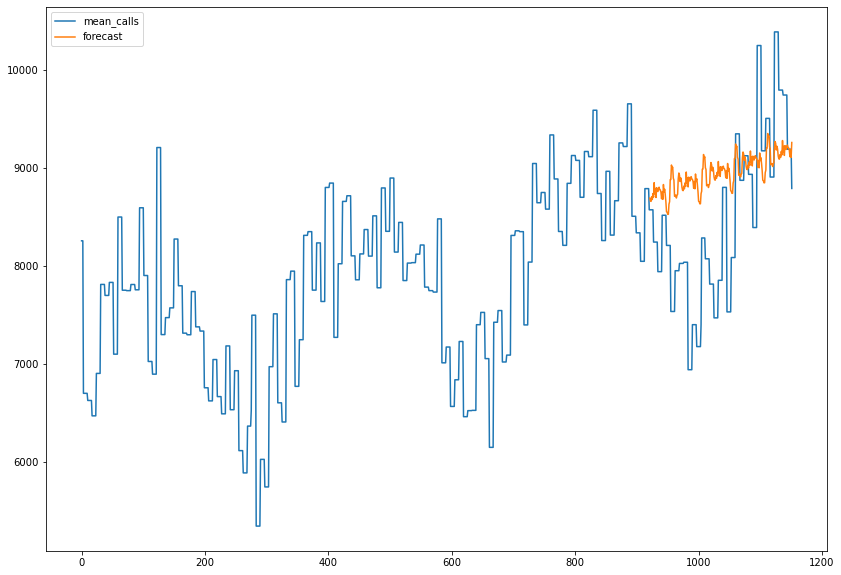

In [66]:
complete_df['forecast']=results.predict(start=921, end=1151, dynamic=True)
complete_df[['mean_calls','forecast']].plot(figsize=(14,10))

In [67]:
print(results.mle_retvals)

{'fopt': 6.209465072113062, 'gopt': array([-1.67190706e-06, -6.91802171e-07,  2.16804352e-07, -1.42108547e-09]), 'fcalls': 280, 'warnflag': 0, 'converged': True, 'iterations': 40}


In [68]:
y_pred = complete_df['forecast'].iloc[921:]
mean_squared_error(y_pred, y_test)

# mse schlechter ohne zweiten ar teil

79151938.66577184

In [ ]:
#pred = results.get_prediction(start=920, end=1151, dynamic=False)
#pred_ci = pred.conf_int()
#ax = complete_df.mean_calls.iloc[0:].plot(label='observed')
#pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
#ax.fill_between(pred_ci.index,
                #pred_ci.iloc[:, 0],
                #pred_ci.iloc[:, 1], color='k', alpha=.2)
#ax.set_xlabel('Date')
#ax.set_ylabel('Calls')
#plt.legend()
#plt.show()

In [ ]:
# with pred mean
#y_forecasted = pred.predicted_mean
#y_truth = df.calls[920:]
#mse = ((y_forecasted - y_truth) ** 2).mean()
#print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
#print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

In [30]:
#series1=results.predict(start=920, end=1151, dynamic=False)

#series2 = pred.predicted_mean

In [ ]:
#y_forecasted2 = series1
#y_truth2 = df.calls[920:]
#mse2 = ((y_forecasted2 - y_truth2) ** 2).mean()
#print('The Mean Squared Error of our forecasts is {}'.format(round(mse2, 2)))
#print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse2), 2)))